In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import defaultdict
from nltk.corpus import stopwords



In [17]:
train_orig =  pd.read_csv('data/train.csv', header=0)
test_orig =  pd.read_csv('data/test.csv', header=0)

In [56]:
ques = pd.concat([train_orig[['question1', 'question2']], \
        test_orig[['question1', 'question2']]], axis=0).reset_index(drop='index')
ques.shape

(2750086, 2)

In [72]:
ques = ques.fillna('')

In [75]:
# stops = set(stopwords.words("english"))
def word_match_share(q1,q2, stops=None):    
    q1 = str(q1).lower().split()
    q2 = str(q2).lower().split()
    q1words = {}
    q2words = {}
    for word in q1:
        q1words[word] = 1
    for word in q2:
        q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        print "len(q1words) == 0 or len(q2words) == 0"
        return 0.
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = float(len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

In [76]:
from tqdm import tqdm_notebook

In [77]:
q_dict = defaultdict(dict)
for i in tqdm_notebook(range(ques.shape[0])):
        wm = word_match_share(ques.question1[i], ques.question2[i], stops=None)
        q_dict[ques.question1[i]][ques.question2[i]] = wm
        q_dict[ques.question2[i]][ques.question1[i]] = wm



len(q1words) == 0 or len(q2words) == 0
len(q1words) == 0 or len(q2words) == 0
len(q1words) == 0 or len(q2words) == 0
len(q1words) == 0 or len(q2words) == 0
len(q1words) == 0 or len(q2words) == 0
len(q1words) == 0 or len(q2words) == 0
len(q1words) == 0 or len(q2words) == 0
len(q1words) == 0 or len(q2words) == 0


In [81]:
import pickle 

with open("data/cache/q_dict.pik", 'w') as f:
    pickle.dump(q_dict,f,pickle.HIGHEST_PROTOCOL)

In [21]:
# def q1_q2_intersect(row):
#     return(len(set(q_dict[row['question1']]).intersection(set(q_dict[row['question2']]))))
def q1_q2_wm_ratio(row):
    q1 = q_dict[row['question1']]
    q2 = q_dict[row['question2']]
    inter_keys = set(q1.keys()).intersection(set(q2.keys()))
    if(len(inter_keys) == 0): return 0.
    inter_wm = 0.
    total_wm = 0.
    for q,wm in q1.items():
        if q in inter_keys:
            inter_wm += wm
        total_wm += wm
    for q,wm in q2.items():
        if q in inter_keys:
            inter_wm += wm
        total_wm += wm
    if(total_wm == 0.): return 0.
    return inter_wm/total_wm

In [22]:
train_orig['q1_q2_wm_ratio'] = train_orig.apply(q1_q2_wm_ratio, axis=1, raw=True)
test_orig['q1_q2_wm_ratio'] = test_orig.apply(q1_q2_wm_ratio, axis=1, raw=True)

In [23]:
train_orig['q1_q2_intersect'] = train_orig.apply(q1_q2_intersect, axis=1, raw=True)
test_orig['q1_q2_intersect'] = test_orig.apply(q1_q2_intersect, axis=1, raw=True)


In [24]:
train_feat = train_orig[['q1_q2_intersect', 'q1_q2_wm_ratio']]
test_feat = test_orig[['q1_q2_intersect', 'q1_q2_wm_ratio']]

In [27]:
train_feat.to_csv('data/cache/word_match_train.csv',index=False)
test_feat.to_csv('data/cache/word_match_test.csv',index=False)
 

In [7]:
import pandas as pd
wm  = pd.read_csv('data/cache/word_match_train.csv')

In [13]:
wm.columns

Index([u'q1_q2_intersect', u'q1_q2_wm_ratio'], dtype='object')

In [16]:
print(wm.corr())

                 q1_q2_intersect  q1_q2_wm_ratio
q1_q2_intersect         1.000000        0.333967
q1_q2_wm_ratio          0.333967        1.000000


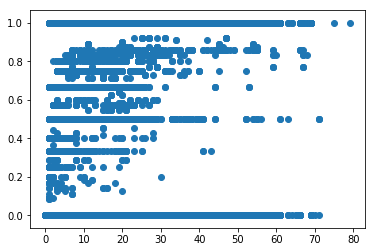

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.scatter(wm.q1_q2_intersect,wm.q1_q2_wm_ratio)
